In [ ]:

from TRIOMA.tools.Extractors.GasLiquidContactor import GLC,GLC_Gas,Fluid
import numpy as np 
R_const=8.314
T = [673, 673, 673, 673, 713, 713, 713, 713, 713]
Z = 0.6
R = 0.0547/2
Q_l = [
    71.0    * 1e-3 / 3600,
    66      * 1e-3 / 3600,
    69      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    61      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    68      * 1e-3 / 3600,
    100     * 1e-3 / 3600,
    70      * 1e-3 / 3600,
]
Q_gas = [
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    3 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    9 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
]
p_in = [1085, 1003, 927, 1188, 1258, 1152, 1158, 1228, 2490]
p_out = [653, 613, 557, 858, 682, 670, 612, 712, 1215]
B_vec = []
kl_vec = []
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    
    PbLi=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=False )
    c_in=p_in[i]**0.5*PbLi.Solubility
    print(c_in)
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]**0.5*PbLi.Solubility,fluid=PbLi,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]**0.5*PbLi.Solubility)
    [a,b] = Melodie.get_kla_from_cout()
    print(a, b)
    B_vec.append(a)
    kl_vec.append(b)
    eff=0.4
    print("c_out is ",Melodie.c_out)    
    Melodie.update_attribute("c_out",Melodie.c_in*(1-eff))
    print("c_out is ",Melodie.c_out)
    height=Melodie.get_z_from_eff()
    print("height is ",height)


0.0034417790539625075
30.212997495461888 0.004067177601956645
c_out is  0.002670082674596489
c_out is  0.0020650674323775043
height is  1.2912838334280303
0.0033091662370995194
28.085321615499783 0.0035040011780107278
c_out is  0.00258701147680372
c_out is  0.0019854997422597115
height is  1.3028648965181888
0.0031813246108238708
29.361927143477047 0.003742090924509363
c_out is  0.0024660150100560044
c_out is  0.0019087947664943223
height is  1.24817786114017
0.0036014412822598482
42.5535175992421 0.0034938164852673726
c_out is  0.0030606365625502644
c_out is  0.002160864769355909
height is  2.033781651601203
0.0037565303086445514
25.957645735537678 0.004207382175829268
c_out is  0.0027659145821595284
c_out is  0.0022539181851867307
height is  1.0483133750233982
0.0035947841337032774
28.936391967484624 0.003987924648121542
c_out is  0.002741473031489975
c_out is  0.0021568704802219663
height is  1.1772293814937955
0.0036041333930131895
28.936391967484624 0.004640300075797558
c_out is  

if done correctly the results should be the same as this table
| B         | kla$$10^3$$    |
|-----------|----------------|
| 30.2      | 4.87           |
| 28.0      | 3.92           |
| 29.4      | 4.13           |
| 42.6      | 3.88           |
| 26.0      | 5.06           |
| 28.9      | 4.50           |
| 28.9      | 5.16           |
| 42.6      | 6.99           |
| 29.8      | 6.12           |
| 28.2      | 2.84           |
| 14.1      | 2.12           |
| 14.1      | 1.90           |
| 14.1      | 1.66           |
| 14.1      | 1.73           |



height is  2.544390893322547
eff_res is  0.49999027788936184
err is  -9.72211063815509e-06
the new eff is  0.4999999999999999
height is  2.729602289819409
eff_res is  0.5222120106668705
err is  -1.0211555351746782e-05
the new eff is  0.5222222222280994
height is  2.9259794432293704
eff_res is  0.5444337277787316
err is  -1.0716665712839912e-05


c:\Users\Gabriele\OneDrive - Massachusetts Institute of Technology\Desktop\TRIOMA\tools\extractor.py:81: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral = integrate.quad(toint, c_out, c_in)


the new eff is  0.5444444444444441
height is  3.134797603842483
eff_res is  0.5666554297411478
err is  -1.1236925518853802e-05
the new eff is  0.566666666666667
height is  3.357561346570465
eff_res is  0.5888773930968605
err is  -1.149579202841533e-05
the new eff is  0.5888888888888889
height is  3.596061905952935
eff_res is  0.6110988868428707
err is  -1.2224268240323966e-05
the new eff is  0.6111111111111113
height is  3.8524534532347854
eff_res is  0.6333209563612109
err is  -1.2376972122418728e-05
the new eff is  0.6333333333702937
height is  4.129356278614879
eff_res is  0.6555427939717063
err is  -1.2761583849107971e-05
the new eff is  0.6555555555789387
height is  4.429999011993056
eff_res is  0.6777642340213054
err is  -1.3543756472333968e-05
the new eff is  0.6777777777777775
height is  4.758418865746637
eff_res is  0.6999861115257614
err is  -1.3888474238554771e-05
the new eff is  0.7
height is  1.6181337307151458
eff_res is  0.49999289351322546
err is  -7.106486774544063e-06

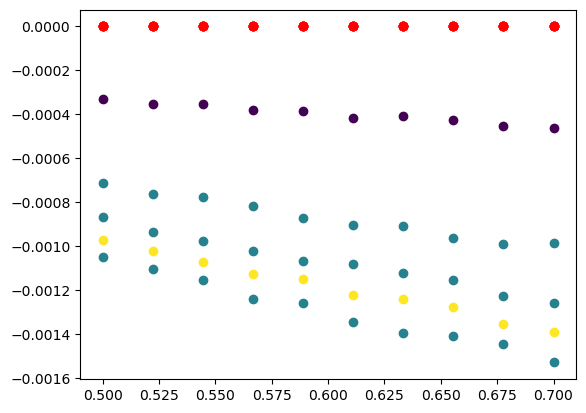

In [2]:
# reset notebook
%reset -f
from math import nan
from pyexpat import model

from sympy import Q
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
import mph 
R_const=8.31
T = [673, 673, 673, 673, 673]
Z = 0.8
R = 0.03
Q_l = np.array([
    80.0 * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
])
Q_gas = np.array([
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    30 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
])
L_on_g=Q_l/Q_gas
p_in = [1275, 1050, 988, 463, 225]
p_out = [796, 515, 484, 267, 130]
B_vec = []
kl_vec = []
client=mph.start()
model = client.load('GenericLMGLC.mph')
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=0,p_tot=1.5E5)
    PbLi=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=False )
    c_in=p_in[i]**0.5*PbLi.Solubility
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]**0.5*PbLi.Solubility,fluid=PbLi,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]**0.5*PbLi.Solubility)
    [a,b] = Melodie.get_kla_from_cout()
    # print(a, b)
    B_vec.append(a)
    kl_vec.append(b)
    eff_v=np.linspace(0.5,0.7,10)
    # eff_v=np.array([1-Melodie.c_out/Melodie.c_in])
    height_v=[]
    err_v=[]
    norm = plt.Normalize(min(Q_l/Q_gas), max(Q_l/Q_gas))
    for eff in eff_v:
        Melodie.c_out=Melodie.c_in*(1-eff)
        # Melodie.GLC_gas.update_attribute("p_out",Melodie.c_in**2/PbLi.Solubility**2)
        height=Melodie.get_z_from_eff()
        print("height is ",height)
        c_PbLi=56182
        height_v.append(height)
        flag_coms=1
        if isinstance(height,float) and flag_coms!=0:
            # model.parameter("H",height)
            Melodie.H=height
            model.parameter("H",height)
            model.parameter("Ls",Q_l[i]*c_PbLi)
            model.parameter("Vs",Q_gas[i])
            model.parameter("R",R)
            model.parameter("c2_in",1E-10)
            model.parameter("Kl_a",Melodie.kla)
            model.parameter("c_in",c_in)
            # model.save()
            model.solve()
            eff_coms=model.evaluate("eff")
            eff_res=eff_coms
            err=eff_res-eff
            print("eff_res is ",eff_res)
            print("err is ",err)    
            err_v.append(err)
            plt.scatter( eff,err*100, c=Q_l[i]/Q_gas[i], cmap='viridis', norm=norm)
            Melodie.get_c_out()
            print("the new eff is ",Melodie.eff)
            err2=eff-Melodie.eff
            plt.scatter(eff,err2,color='red')
            
        

height is  0.720061670074963
eff_res is  0.19997359520922475
err is  -2.640479077525848e-05
height is  0.8681402181958762
eff_res is  0.23330253196635126
err is  -3.080136698208058e-05
height is  1.027033330914342
eff_res is  0.2666315429296986
err is  -3.512373696806792e-05
height is  1.1982922375343155
eff_res is  0.2999605635445263
err is  -3.94364554737181e-05
height is  1.3838287384706722
eff_res is  0.3332893846017912
err is  -4.3948731542176045e-05
height is  1.5860359418850742
eff_res is  0.36661836459053476
err is  -4.830207613193416e-05
height is  1.807964155118837
eff_res is  0.3999473165398151
err is  -5.268346018494352e-05
height is  2.053585207224504
eff_res is  0.43327650089149394
err is  -5.683244183940506e-05
height is  2.3282045348546148
eff_res is  0.4666050935296861
err is  -6.157313698057498e-05
height is  2.6391326978768395
eff_res is  0.49993405177809785
err is  -6.594822190214567e-05
height is  0.4167777618707424
eff_res is  0.19997741163895422
err is  -2.258836

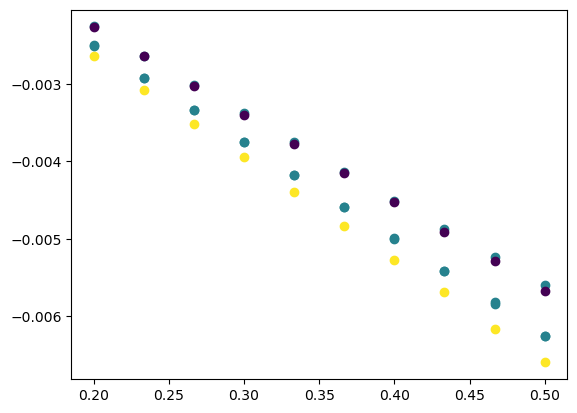

In [3]:
# reset notebook
%reset -f
from math import nan
from pyexpat import model

from sympy import Q
from tools.component_tools import GLC,GLC_Gas,Fluid
import numpy as np 
import matplotlib.pyplot as plt
import mph 
R_const=8.31
T = [673, 673, 673, 673, 673]
Z = 0.8
R = 0.03
Q_l = np.array([
    80.0 * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
    40   * 1e-3 / 3600,
])
Q_gas = np.array([
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    30 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
    6 * 1e-3 / 3600,
])
L_on_g=Q_l/Q_gas
p_in = [1275, 1050, 988, 463, 225]
p_out = [796, 515, 484, 267, 130]
B_vec = []
kl_vec = []
client=mph.start()
model = client.load('GenericLMGLC.mph')
for i in range(len(Q_gas)):
    SweepGas=GLC_Gas(G_gas=Q_gas[i],pg_in=100,p_tot=1.5E5)
    PbLi=Fluid(Solubility=1.33E-4*np.exp(-1350/R_const/T[i]),MS=False )
    c_in=p_in[i]**0.5*PbLi.Solubility
    Melodie=GLC(H=Z,R=R,c_in=p_in[i]**0.5*PbLi.Solubility,fluid=PbLi,GLC_gas=SweepGas,T=T[i],G_L=Q_l[i],c_out=p_out[i]**0.5*PbLi.Solubility)
    [a,b] = Melodie.get_kla_from_cout()
    # print(a, b)
    B_vec.append(a)
    kl_vec.append(b)
    eff_v=np.linspace(0.2,0.5,10)
    # eff_v=np.array([1-Melodie.c_out/Melodie.c_in])
    height_v=[]
    err_v=[]
    norm = plt.Normalize(min(Q_l/Q_gas), max(Q_l/Q_gas))
    for eff in eff_v:
        Melodie.c_out=Melodie.c_in*(1-eff)
        Melodie.GLC_gas.update_attribute("pg_in",p_out[i]/10)
        height=Melodie.get_z_from_eff()
        print("height is ",height)
        c_PbLi=56182
        height_v.append(height)
        flag_coms=1
        if isinstance(height,float) and flag_coms!=0:
            # model.parameter("H",height)
            model.parameter("H",height)
            model.parameter("Ls",Q_l[i]*c_PbLi)
            model.parameter("Vs",Q_gas[i])
            model.parameter("R",R)
            model.parameter("c2_in",Melodie.GLC_gas.pg_in/R_const/T[i])
            model.parameter("Kl_a",Melodie.kla)
            model.parameter("c_in",c_in)
            # model.save()
            model.solve()
            eff_coms=model.evaluate("eff")
            eff_res=eff_coms
            err=eff_res-eff
            print("eff_res is ",eff_res)
            print("err is ",err)    
            err_v.append(err)
            plt.scatter( eff,err*100, c=Q_l[i]/Q_gas[i], cmap='viridis', norm=norm)
        

In [4]:


Melodie.GLC_gas.inspect()
# model.save()


G_gas: 1.6666666666666667e-06
pg_in: 13.0
p_tot: 150000.0
pg_out: 0


In [5]:
Melodie.inspect()

c_in: 0.0015671441284451032
eff: None
fluid is a <class 'tools.component_tools.Fluid'> class, printing its variables:
    T: None
    MS: False
    D: None
    Solubility: 0.00010447627522967355
    k_t: None
    d_Hyd: None
    mu: None
    rho: None
    recirculation: 0
    U0: None
    k: None
    cp: None
    inv: None
H: 0.8
R: 0.03
L: None
G_L: 1.1111111111111112e-05
T: 673
GLC_gas: <tools.component_tools.GLC_Gas object at 0x0000017163DCCE10>
c_out: 0.0007835720642225516
kla: 0.006421367879948947
Bl: 14.147106052612921
